# Handwritten Digit Recognition - RFC

In [50]:
!pip install python-mnist


In [51]:
!pip install numpy scikit-learn matplotlib --user

In [52]:
# Save classifier
with open('MNIST_RFC.pickle', 'wb') as f:
    pickle.dump(clf, f)


In [53]:
# Load classifier
pickle_in = open('MNIST_RFC.pickle', 'rb')
clf = pickle.load(pickle_in)


In [54]:
# Accuracy on validation split
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nRFC Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

RFC Trained Classifier Confidence:  0.9688333333333333

Predicted Values:  [3 2 2 ... 4 0 9]

Accuracy of Classifier on Validation Image Data:  0.9688333333333333

Confusion Matrix: 
 [[534   0   0   0   0   0   2   0   3   0]
 [  0 658   6   2   1   0   0   2   0   0]
 [  1   2 569   3   5   0   0   6   6   1]
 [  2   1   7 578   1   6   2   5   2   3]
 [  2   1   1   0 558   0   3   2   2   9]
 [  1   1   1   6   1 543   1   0   3   4]
 [  4   3   0   0   1   4 633   0   2   0]
 [  1   3   5   1   3   0   0 589   1   9]
 [  0   2   3   2   0   3   0   0 559   7]
 [  1   0   0  11   9   1   0   0   4 592]]


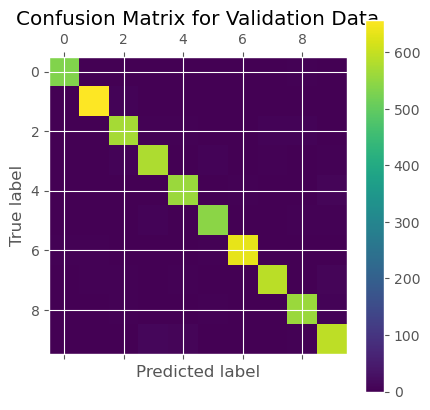

In [55]:
# Plot Confusion Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [56]:
# ROC-AUC Score for Validation
print('\nCalculating ROC-AUC for Validation Data...')
y_test_bin = label_binarize(y_test, classes=range(10))
y_score = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print("Multi-class ROC-AUC Score (OVR):", auc_score)


Calculating ROC-AUC for Validation Data...
Multi-class ROC-AUC Score (OVR): 0.9989928823245577


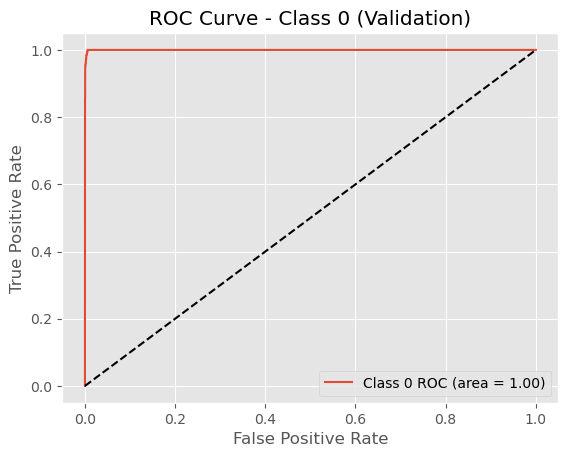

In [57]:
# Plot ROC curve for class '0' as an example
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_score[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Class 0 ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Class 0 (Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [58]:
# Evaluate on full test data
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)
print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)
print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9697

Confusion Matrix for Test Data: 
 [[ 970    0    0    0    0    2    3    1    4    0]
 [   0 1124    3    2    0    2    2    0    1    1]
 [   6    0 1002    3    3    0    4    8    6    0]
 [   1    0   11  969    0    8    0    9    8    4]
 [   1    0    2    0  956    0    5    0    2   16]
 [   4    0    1   10    4  860    4    3    4    2]
 [   7    3    0    0    3    3  941    0    1    0]
 [   1    4   20    2    2    0    0  985    3   11]
 [   3    1    3    9    5    5    3    4  932    9]
 [   8    6    1   14   10    2    1    4    5  958]]


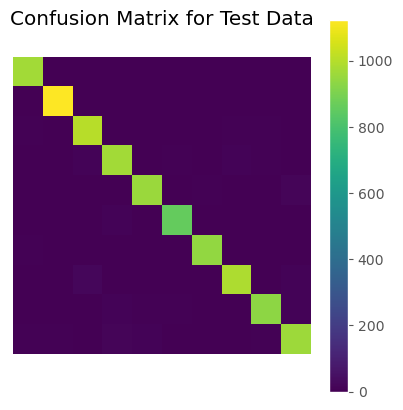

In [59]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

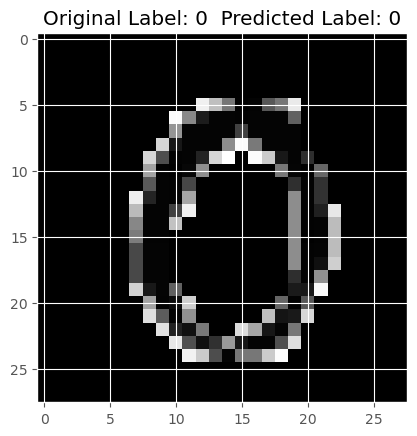

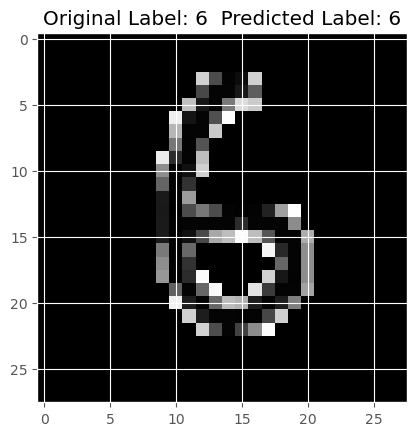

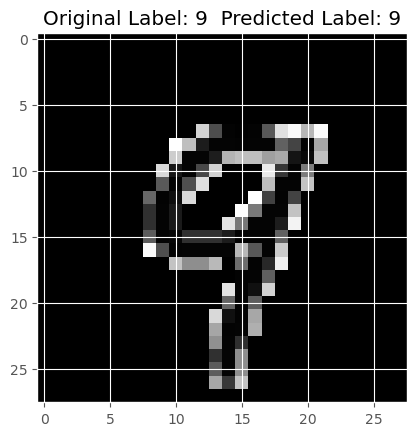

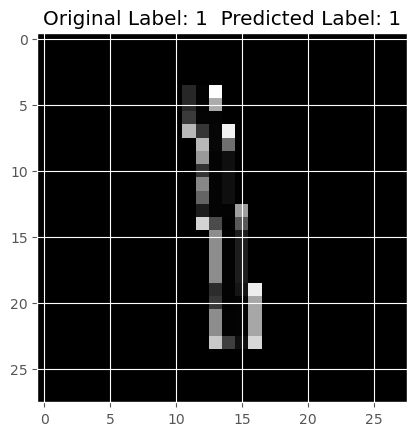

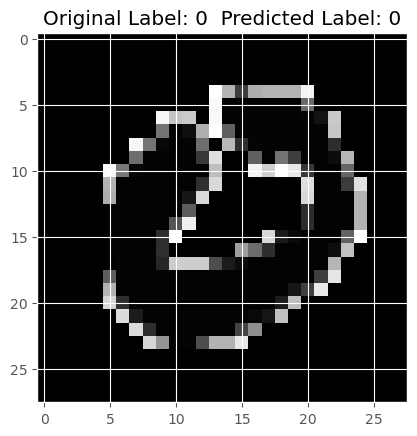

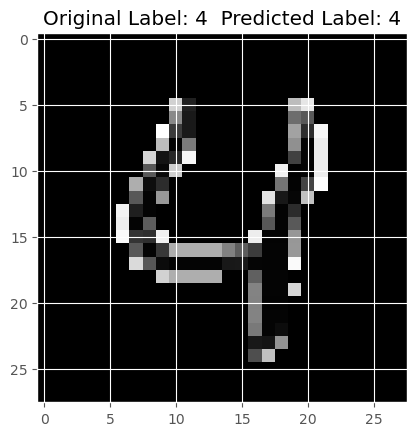

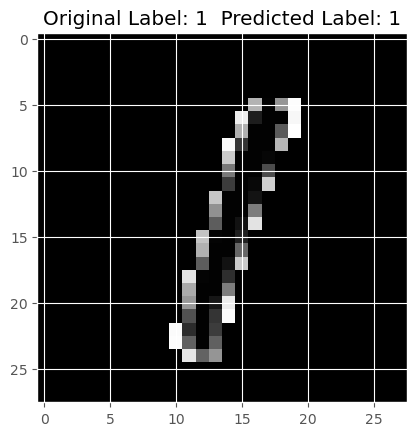

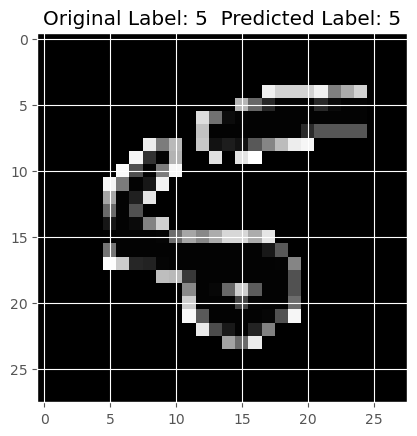

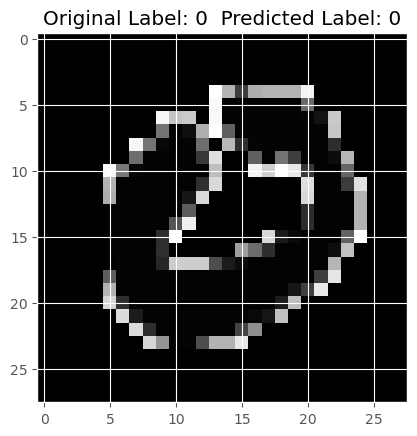

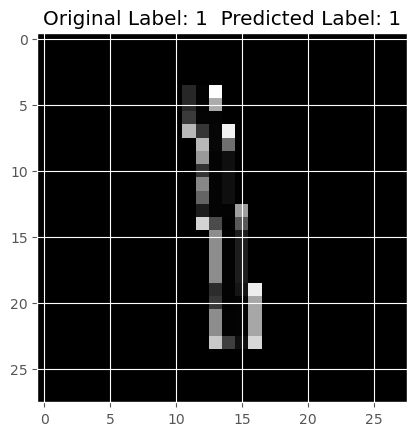

✅ Trained RFC model saved as 'trained_rfc_model.pkl' for Streamlit use.


In [60]:
# Show Test Images with Predicted and True Labels
a = np.random.randint(1, 30, 10)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
    
with open('trained_rfc_model.pkl', 'wb') as model_out:
    pickle.dump(clf, model_out)

print("✅ Trained RFC model saved as 'trained_rfc_model.pkl' for Streamlit use.")


# Handwritten Digit Recognition - SVM

In [61]:
with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [62]:
pickle_in = open('MNIST_SVM.pickle', 'rb')
clf = pickle.load(pickle_in)

In [63]:
print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nSVM Trained Classifier Accuracy: ', acc)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Images: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

SVM Trained Classifier Accuracy:  0.9688333333333333

Predicted Values:  [3 2 2 ... 4 0 9]

Accuracy of Classifier on Validation Images:  0.9688333333333333

Confusion Matrix: 
 [[534   0   0   0   0   0   2   0   3   0]
 [  0 658   6   2   1   0   0   2   0   0]
 [  1   2 569   3   5   0   0   6   6   1]
 [  2   1   7 578   1   6   2   5   2   3]
 [  2   1   1   0 558   0   3   2   2   9]
 [  1   1   1   6   1 543   1   0   3   4]
 [  4   3   0   0   1   4 633   0   2   0]
 [  1   3   5   1   3   0   0 589   1   9]
 [  0   2   3   2   0   3   0   0 559   7]
 [  1   0   0  11   9   1   0   0   4 592]]


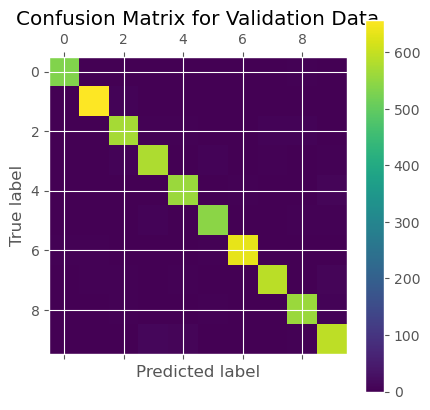

In [64]:
# Plot Confusion Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
# ROC-AUC Score for Validation
print('\nCalculating ROC-AUC for Validation Data...')
y_test_bin = label_binarize(y_test, classes=range(10))
y_score = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print("Multi-class ROC-AUC Score (OVR):", auc_score)


Calculating ROC-AUC for Validation Data...
Multi-class ROC-AUC Score (OVR): 0.9989928823245577


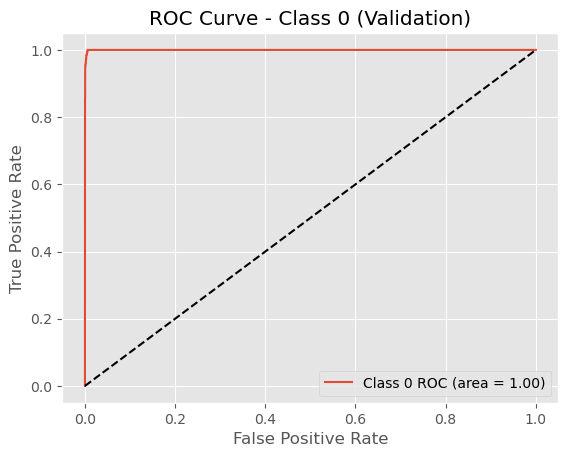

In [66]:
# Plot ROC curve for class '0' as an example
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_score[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Class 0 ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Class 0 (Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [67]:
# Predictions on test data
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data...

Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9697

Confusion Matrix for Test Data: 
 [[ 970    0    0    0    0    2    3    1    4    0]
 [   0 1124    3    2    0    2    2    0    1    1]
 [   6    0 1002    3    3    0    4    8    6    0]
 [   1    0   11  969    0    8    0    9    8    4]
 [   1    0    2    0  956    0    5    0    2   16]
 [   4    0    1   10    4  860    4    3    4    2]
 [   7    3    0    0    3    3  941    0    1    0]
 [   1    4   20    2    2    0    0  985    3   11]
 [   3    1    3    9    5    5    3    4  932    9]
 [   8    6    1   14   10    2    1    4    5  958]]


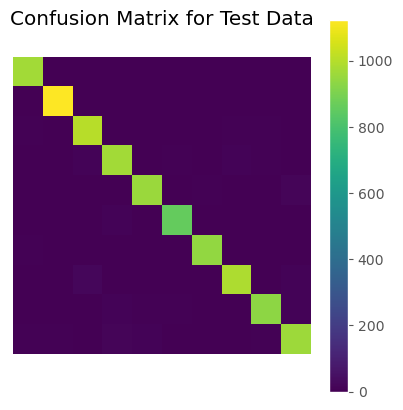

In [68]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

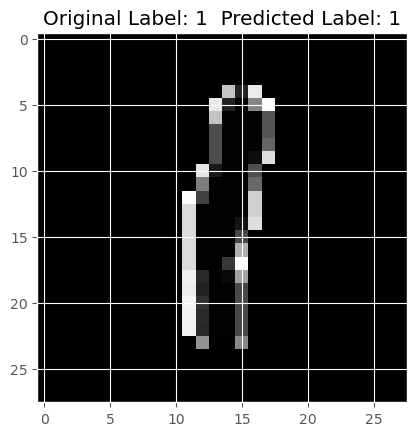

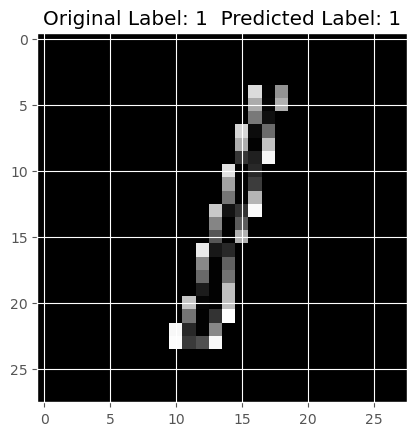

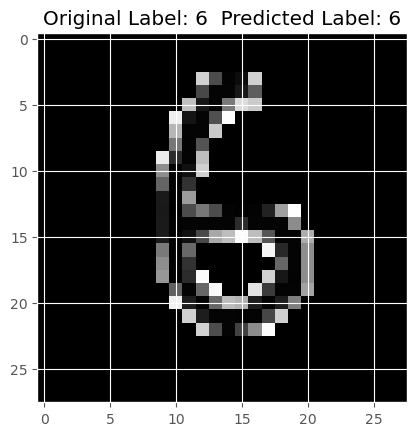

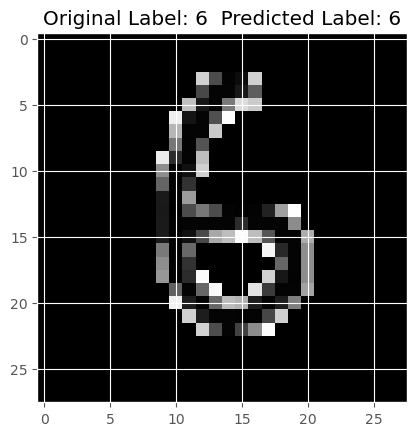

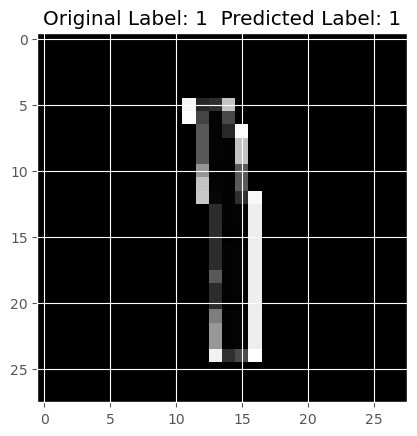

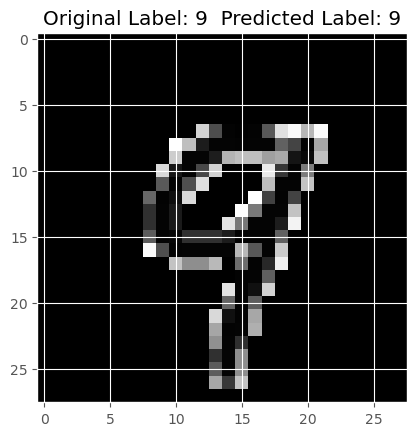

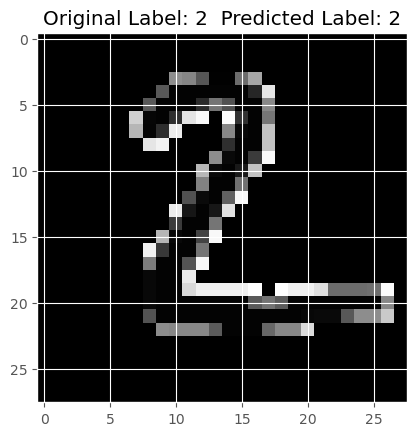

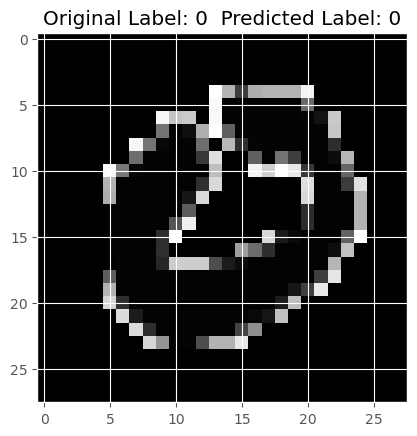

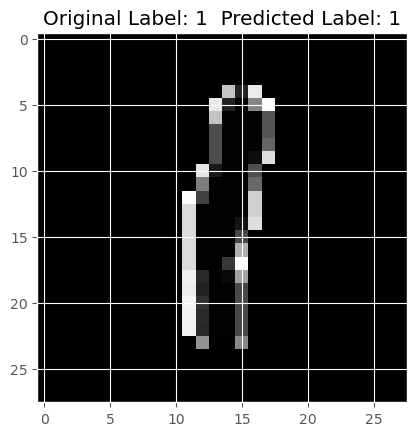

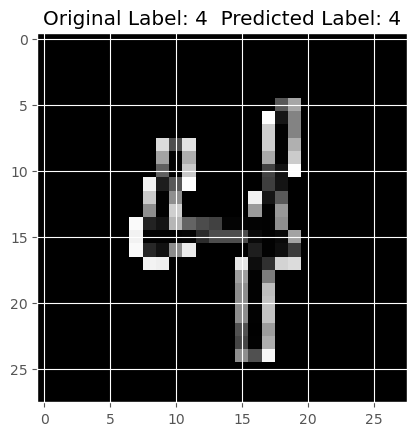

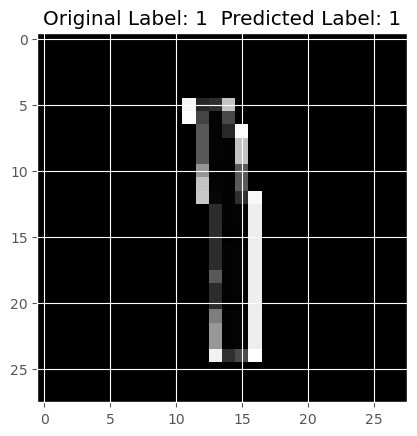

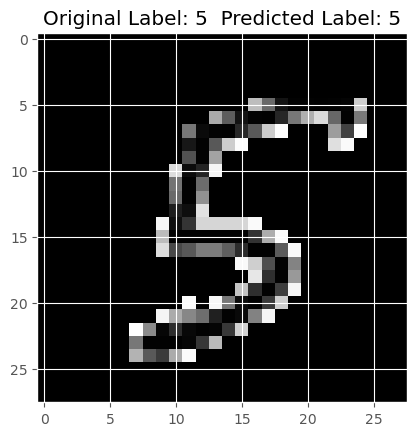

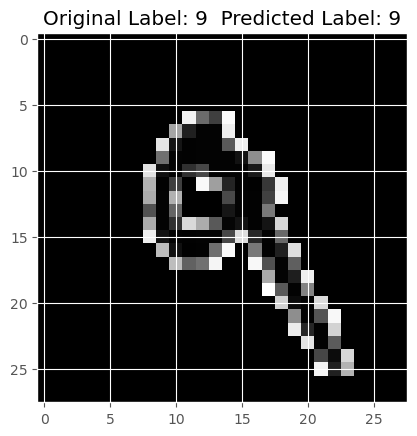

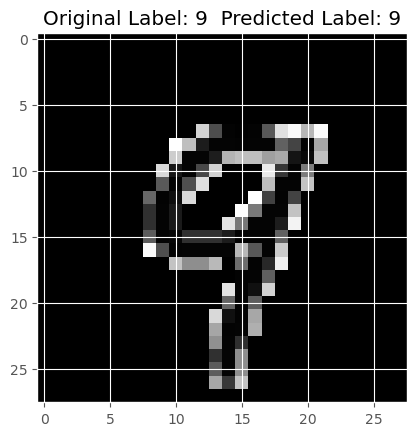

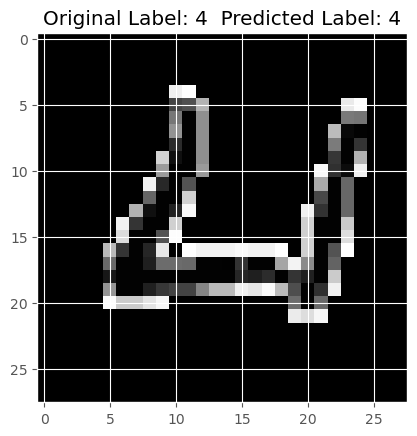


Accuracy of Classifier on Test Images:  0.9697

Confusion Matrix for Test Data: 
 [[ 970    0    0    0    0    2    3    1    4    0]
 [   0 1124    3    2    0    2    2    0    1    1]
 [   6    0 1002    3    3    0    4    8    6    0]
 [   1    0   11  969    0    8    0    9    8    4]
 [   1    0    2    0  956    0    5    0    2   16]
 [   4    0    1   10    4  860    4    3    4    2]
 [   7    3    0    0    3    3  941    0    1    0]
 [   1    4   20    2    2    0    0  985    3   11]
 [   3    1    3    9    5    5    3    4  932    9]
 [   8    6    1   14   10    2    1    4    5  958]]
✅ Trained SVM model saved as 'trained_svm_model.pkl' for Streamlit use.


In [69]:
# Show some test images with predictions
a = np.random.randint(1, 40, 15)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)
with open('trained_svm_model.pkl', 'wb') as model_out:
    pickle.dump(clf, model_out)

print("✅ Trained SVM model saved as 'trained_svm_model.pkl' for Streamlit use.")
